# Importing the required libraries

In [ ]:
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 6.3 kB/s 
     |████████████████████████████████| 439 kB 74.2 MB/s 
     |████████████████████████████████| 1.7 MB 54.1 MB/s 
     |████████████████████████████████| 6.0 MB 44.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully 

In [ ]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

# Load data

In [ ]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

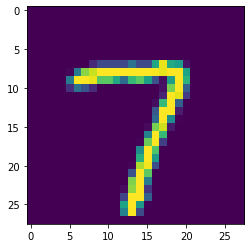

In [ ]:
plt.imshow(x_train[5100])     #ploting the index=image

In [ ]:
np.argmax(y_train[5100])

0

# Reshaping Dataset

In [ ]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# Applying One Hot Encoding

In [ ]:
number_of_classes = 10  #storing the no of classes in a variable

In [ ]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [ ]:
#create model
model=Sequential ()

In [ ]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [ ]:
#flatten the dimension of the image
model.add(Flatten())

In [ ]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [44]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [45]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Test The Model

In [ ]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 157ms/step
[[1.1722690e-11 8.2128224e-09 3.3068840e-08 1.7163588e-07 9.9999976e-01
  4.5914151e-16 7.2796413e-09 1.7104024e-13 3.6467263e-09 1.4024933e-10]]


In [ ]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[4]


In [ ]:
np.argmax(y_test[6000:6001]) #printing the actual labels

1

# Save The model

In [47]:
# Save the model
model.save('models/mnistCNN.h5')

In [48]:
cd models

/content/models/models


In [49]:
!tar -zcvf hdr_deployment.tgz mnistCNN.h5

mnistCNN.h5


In [50]:
ls -1

hdr_deployment.tgz
mnistCNN.h5


# Cloud deploy

In [ ]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 51 kB 510 kB/s 
     |████████████████████████████████| 824 kB 46.5 MB/s 
     |████████████████████████████████| 133 kB 46.4 MB/s 
     |████████████████████████████████| 547 kB 46.2 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=3b0dca9e1aeedec52654693a1a47dafbb6eea4b3f0ffde366f9bb5acdd580c96
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=b9a83cc51b38619fb37f043cdf9694a5b474f1625ecc4930e9a1a338f4c8a519
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [42]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "apikey":"HlTwQuvITnvvDsxczaaa0FJhznlZFmHKMur5chiYHEA1"
}
client = APIClient(credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [51]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-gb:a/97034a53ec954d3caae236729a0d1913:47f0ba7f-0c65-40f5-ad21-21114341092d::',
      'guid': '47f0ba7f-0c65-40f5-ad21-21114341092d',
      'name': 'Watson Machine Learning-dx',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'A Novel Method for Handwritten Digit Recognition System',
    'scope': {'bss_account_id': '97034a53ec954d3caae236729a0d1913'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'a40425fd-7e0e-483e-9398-97265100cde7',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': 'fa782418f74b4eedaa72ce5849198789',
        'api_key': 'ksPdSg91S3TrP1OSm3AI2Dm8fJF1w2776iHnT2C2BdEI',
        'secret_access_key': '0bc9abe24ec3e0d6b1a72c14da55a52a6db5213cc0ec9218',
        'service_id': 'ServiceId-86b1f4c6-b9b9-49a7-92cc-321f817d29e4'},
       'editor': {'access_key_id': 'bdfbb

In [52]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------------------------------------------------  ------------------------
ID                                    NAME                                                     CREATED
823f1ff9-990d-458e-abb6-6f060af815cd  A Novel Method for Handwritten Digit Recognition System  2022-11-19T09:52:49.462Z
------------------------------------  -------------------------------------------------------  ------------------------


In [53]:
space_uid="823f1ff9-990d-458e-abb6-6f060af815cd"
space_uid

'823f1ff9-990d-458e-abb6-6f060af815cd'

In [54]:
client.set.default_space(space_uid)

'SUCCESS'

In [55]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [56]:
software_space_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [57]:
model_details = client.repository.store_model(model="hdr_deployment.tgz", meta_props={
    client.repository.ModelMetaNames.NAME:"A Novel Method for Handwritten Digit Recognition System",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [58]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-19T10:41:33.410Z',
  'id': 'a4c3eeea-d90c-445a-b8c7-2525517c1de1',
  'modified_at': '2022-11-19T10:41:36.616Z',
  'name': 'A Novel Method for Handwritten Digit Recognition System',
  'owner': 'IBMid-6610046MH4',
  'resource_key': 'f69b6453-c05d-4f2c-b8f4-5618c5ac16b0',
  'space_id': '823f1ff9-990d-458e-abb6-6f060af815cd'},
 'system': {'warnings': []}}

In [59]:
model_id = client.repository.get_model_id(model_details)
model_id

'a4c3eeea-d90c-445a-b8c7-2525517c1de1'

In [60]:
client.repository.download(model_id,'B2_IBM_Model.tgz')

Successfully saved model content to file: 'B2_IBM_Model.tgz'


'/content/models/models/B2_IBM_Model.tgz'